In [71]:
#LIBRARIES:

#Import data wrangling libraries
import pandas as pd
import numpy as np
import os
import time

#Import graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score  

In [105]:
# FUNCTIONS:

#Importing dataset
def get_data(file):
    return pd.read_csv('../{}.csv'.format(file),  sep=';')



#Defining features and groundtruth
def set_xy(data, tst_size):
    X = data.drop(['cardio', 'id'], axis=1)
    y = data.cardio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tst_size)
    return X, X_train, X_test, y, y_train, y_test



#Plotting a correlation heatmap
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    ax = sns.heatmap(corr, annot=True, cmap=cmap).set_title("Data Correlation Heatmap")
    fig.savefig('images/corr_heatmap.png')

    
    
#Checking data types and null values from data set
def check_data(df):
    print('------- Checking Data -------\n\nDataFrame shape: {}\n\n'.format(data.shape))
    plot_corr(df)
    print('The number of N/A values in the data frame are: \n{}\n\n'.format(df.isna().sum()))
    print('The types of data in the data frame are: \n{}\n'.format(df.dtypes))
    print('\n\n------- Checking Data -------\n\n')

    
    
#Graphing confusion matrix for results
def conf_mat(y_test, y_pred, title, size=3):
    conf = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize = (size,size))
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    ax = sns.heatmap(conf, annot=True, cmap=cmap).set_title("Confusion Matrix for {}".format(title))
    plt.xlabel("Groundtruth")
    plt.ylabel("Predictions")
    fig.savefig('images/conf_mat_heatmap.png')
 

#Logistic Regresion Model
def LR_model(X, X_train, X_test, y, y_train, y_test, predict = True):
    now = time.time()
    clf = LogisticRegression(solver='lbfgs', max_iter=500)
    if predict:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = round(accuracy_score(y_test, y_pred),4)
        conf_mat(y_test, y_pred, 'Logistic Regresion')
        roc(y_test, y_pred)
        print('Logistic Regresion accuracy score: {}'.format(acc))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
    else:
        scores = cross_val_score(clf, X, y, cv=5)
        print('Log. Reg. Score: {:.3f} (+/- {:.2f})'.format(np.mean(scores), np.std(scores)))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))

        
        
#Support Vector Machine Classifier prediction
def SVC_model(X, X_train, X_test, y, y_train, y_test, predict = True):
    now = time.time()
    clf = SVC(gamma='scale')
    if predict:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = round(accuracy_score(y_test, y_pred),4)
        conf_mat(y_test, y_pred, 'Support Vector Classifier')
        roc(y_test, y_pred)
        print('Support Vector Classifier accuracy score: {}'.format(acc))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))

    else:
        scores = cross_val_score(clf, X, y, cv=5)
        print('Supp. Vec. Score: {:.3f} (+/- {:.2f})'.format(np.mean(scores), np.std(scores)))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
    
    
    
#Random Forest Classifier prediction
def RF_model(X, X_train, X_test, y, y_train, y_test, n_est=100, max_depth=2, predict = True):
    now = time.time()
    clf = RandomForestClassifier(n_estimators=n_est, max_depth=max_depth, random_state=0)
    if predict:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = round(accuracy_score(y_test, y_pred),4)
        conf_mat(y_test, y_pred, 'Random Forest Classifier')
        roc(y_test, y_pred)
        print('Random Forest Classifier accuracy score: {}'.format(acc))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
    else:
        scores = cross_val_score(clf, X, y, cv=5)
        print('Rand. Frst. Score: {:.3f} (+/- {:.2f})'.format(np.mean(scores), np.std(scores)))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
        
        
        
#K-Neighbors Classifier prediction
def KN_model(X, X_train, X_test, y, y_train, y_test, predict = True):
    now = time.time()
    clf = KNeighborsClassifier(n_neighbors=5)
    if predict:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = round(accuracy_score(y_test, y_pred),4)
        conf_mat(y_test, y_pred, 'Random Forest Classifier')
        roc(y_test, y_pred)
        print('Random Forest Classifier accuracy score: {}'.format(acc))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
    else:
        scores = cross_val_score(clf, X, y, cv=5)
        print('K-Neigh. Score: {:.3f} (+/- {:.2f})'.format(np.mean(scores), np.std(scores)))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
        
        
        
#Random Forest Classifier grid serach
def RF_grid(X, X_train, X_test, y_train, y, y_test, n_est=100, max_depth=2):
    results=[]
    for est in n_est:
        for depth in max_depth:
            now = time.time()
            clf = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=0)
            scores = cross_val_score(clf, X, y, cv=5)
            res={
                'Num-Estimators':est,
                'Max-Depth':depth,
                'Score':np.mean(scores),
                'Comp-Time':time.time()-now
            }
            results.append(res)
    return results

#ROC curve plot
def plot_roc_curve(fpr, tpr, size=8):
    fig, ax = plt.subplots(figsize = (size,size))
    sns.set()
    ax = sns.lineplot(fpr, tpr, label='ROC')
    ax = sns.lineplot([0, 1], [0, 1], palette='purple', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    fig.savefig('images/ROC.png')

#Defines ROC parameters and AUC
def roc(y_test, y_pred):
    auc = roc_auc_score(y_test, y_pred)
    print('--------------------\n\nAUC: {0:.3f}'.format(auc))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plot_roc_curve(fpr, tpr)

------- Checking Data -------

DataFrame shape: (70000, 13)


The number of N/A values in the data frame are: 
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


The types of data in the data frame are: 
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object



------- Checking Data -------




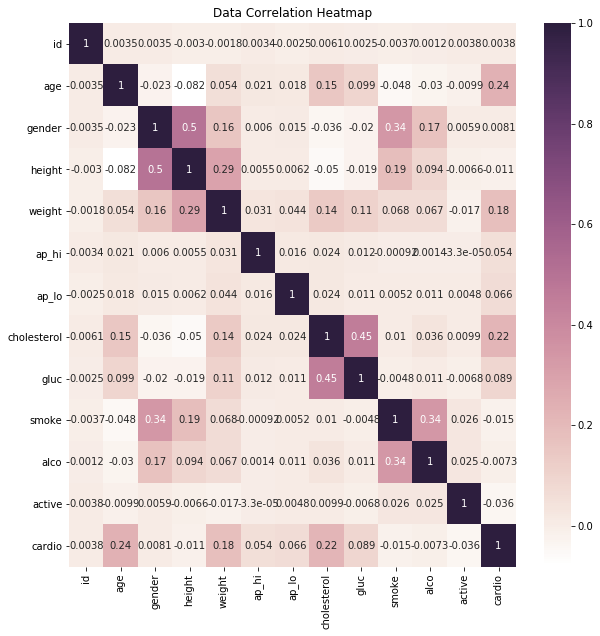

In [79]:
#CHECK DATA SET QUALITY:

if __name__ == "__main__":
    init_time = time.time()
    data = get_data('cardio_train')
    check_data(data)

In [18]:
# SCORING MODELS WITH DEFAULT PARAMETERS

if __name__ == "__main__":
    print ("Model's performace results:")
    sample_data = data.sample(frac=0.05)
    X, X_train, X_test, y, y_train, y_test = set_xy(sample_data, 0.80)
    LR_model(X, X_train, X_test, y, y_train, y_test, predict=False)
    SVC_model(X, X_train, X_test, y, y_train, y_test, predict=False)
    RF_model(X, X_train, X_test, y, y_train, y_test, predict=False)
    KN_model(X, X_train, X_test, y, y_train, y_test, predict = False)

Model's performace results:
Log. Reg. Score: 0.702 (+/- 0.01)
Computational time: 0.47sec. 

-------------------------
Supp. Vec. Score: 0.594 (+/- 0.02)
Computational time: 2.45sec. 

-------------------------
Rand. Frst. Score: 0.715 (+/- 0.01)
Computational time: 0.69sec. 

-------------------------
K-Neigh. Score: 0.645 (+/- 0.02)
Computational time: 0.16sec. 

-------------------------


In [19]:
# Grid Search optimizer for Random Forest 
if __name__ == "__main__":
    n_est = [10,100,500,1000]
    max_depth = [2,4,5,10]
    grid_result = pd.DataFrame(RF_grid(X, X_train, X_test, y_train, y, y_test, n_est, max_depth))
    grid_result['Score/Time'] = grid_result['Score']/grid_result['Comp-Time']
    display(grid_result)
    

,Comp-Time,Max-Depth,Num-Estimators,Score,Score/Time
0,0.104047,2,10,0.695991,6.689213
1,0.124992,4,10,0.717712,5.742067
2,0.123909,5,10,0.719424,5.806064
3,0.158953,10,10,0.723427,4.551201
4,0.712693,2,100,0.715428,1.003836
5,0.861083,4,100,0.727140,0.844449
6,0.960585,5,100,0.733996,0.764113
7,1.376911,10,100,0.729715,0.529965
8,3.288149,2,500,0.715993,0.217750
9,4.064662,4,500,0.725425,0.178471


In [20]:
# Grid Search optimizer for Random Forest 
if __name__ == "__main__":
    n_est = [5,10,50,100]
    max_depth = [3,4,5]
    grid_result = pd.DataFrame(RF_grid(X, X_train, X_test, y_train, y, y_test, n_est, max_depth))
    grid_result['Score/Time'] = grid_result['Score']/grid_result['Comp-Time']
    display(grid_result)

,Comp-Time,Max-Depth,Num-Estimators,Score,Score/Time
0,0.068847,3,5,0.714850,10.383107
1,0.071758,4,5,0.716572,9.986012
2,0.071405,5,5,0.718000,10.055355
3,0.102579,3,10,0.725140,7.069067
4,0.108511,4,10,0.717712,6.614201
5,0.117881,5,10,0.719424,6.102950
6,0.399561,3,50,0.727422,1.820551
7,0.449756,4,50,0.725137,1.612289
8,0.490012,5,50,0.730567,1.490916
9,0.819309,3,100,0.724853,0.884713


In [21]:
# Grid Search optimizer for Random Forest 
if __name__ == "__main__":
    n_est = [20,30,40,50]
    max_depth = [4,5]
    grid_result = pd.DataFrame(RF_grid(X, X_train, X_test, y_train, y, y_test, n_est, max_depth))
    grid_result['Score/Time'] = grid_result['Score']/grid_result['Comp-Time']
    display(grid_result)

,Comp-Time,Max-Depth,Num-Estimators,Score,Score/Time
0,0.204281,4,20,0.723705,3.542693
1,0.213571,5,20,0.727418,3.405974
2,0.273243,4,30,0.723133,2.646485
3,0.308665,5,30,0.729993,2.365003
4,0.403952,4,40,0.724847,1.794388
5,0.487011,5,40,0.731422,1.501860
6,0.517703,4,50,0.725137,1.400681
7,0.495942,5,50,0.730567,1.473089


--------------------

AUC: 0.732


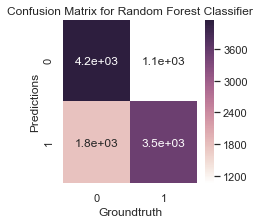

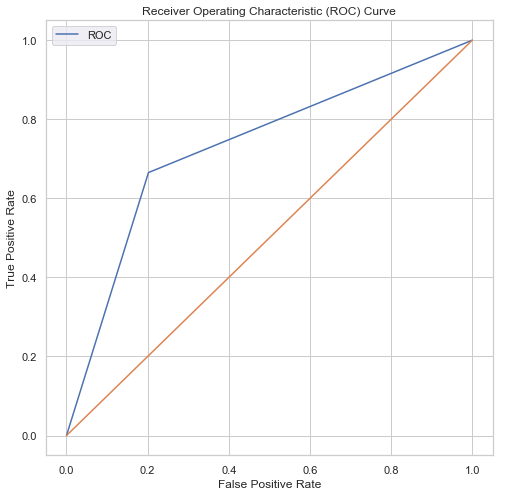

Random Forest Classifier accuracy score: 0.731
Computational time: 1.40sec. 

-------------------------
Total run time: 1284sec.


In [106]:
# TESTING MODEL WITH DEAFULT SETTINGS
if __name__ == "__main__":
    X, X_train, X_test, y, y_train, y_test = set_xy(data, 0.15)
    RF_model(X, X_train, X_test, y, y_train, y_test, 30, 5)
    print('Total run time: {0:.0f}sec.'.format(time.time()-init_time))